In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy import ndimage
from skimage.feature import peak_local_max

%matplotlib inline

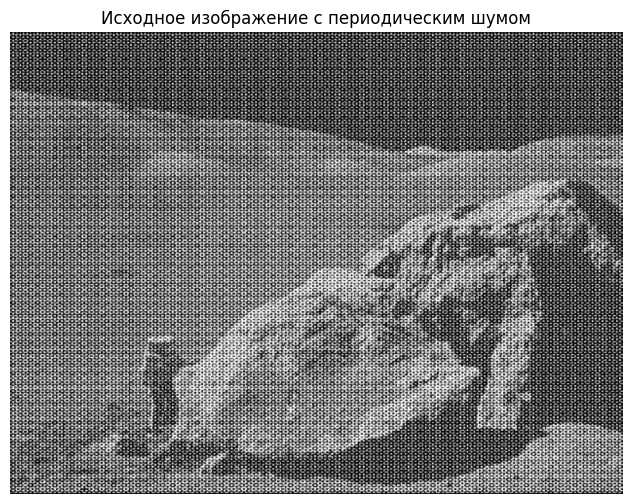

Размер изображения: (594, 787)


In [6]:

path = r'C:\\Users\\engfile\\image_processing\\dz5\\periodic_noise.JPG'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Не удалось открыть изображение. Проверь путь к файлу!")

plt.figure(figsize=(8, 6))
plt.imshow(img, cmap='gray')
plt.title("Исходное изображение с периодическим шумом")
plt.axis('off')
plt.show()

print(f"Размер изображения: {img.shape}")

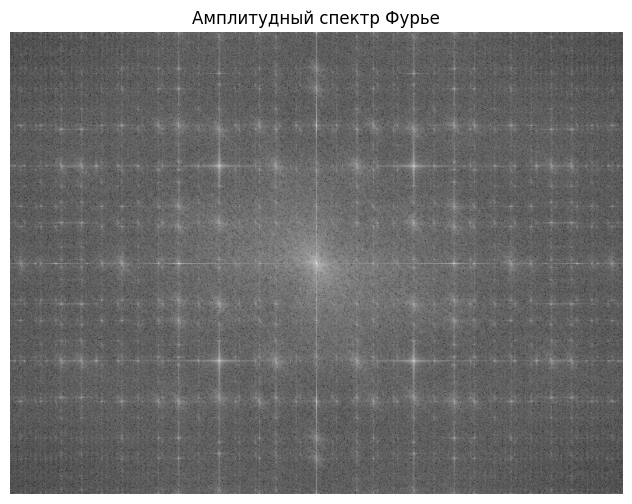

На спектре видны яркие точки - это частоты периодического шума


In [7]:

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

plt.figure(figsize=(8, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Амплитудный спектр Фурье")
plt.axis('off')
plt.show()

print("На спектре видны яркие точки - это частоты периодического шума")

In [9]:
print("=== АВТОМАТИЧЕСКОЕ ОБНАРУЖЕНИЕ ПИКОВ ШУМА ===")

coordinates = peak_local_max(magnitude_spectrum, 
                           min_distance=20, 
                           threshold_abs=150, 
                           exclude_border=20)

print(f"Найдено {len(coordinates)} пиков в спектре")

rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)

r = 8

for coord in coordinates:
    y, x = coord

    if abs(y - crow) < 10 and abs(x - ccol) < 10:
        continue

    cv2.circle(mask, (x, y), r, 0, -1)

    cv2.circle(mask, (cols - x, rows - y), r, 0, -1)

print("✓ Маска создана")

=== АВТОМАТИЧЕСКОЕ ОБНАРУЖЕНИЕ ПИКОВ ШУМА ===
Найдено 328 пиков в спектре
✓ Маска создана


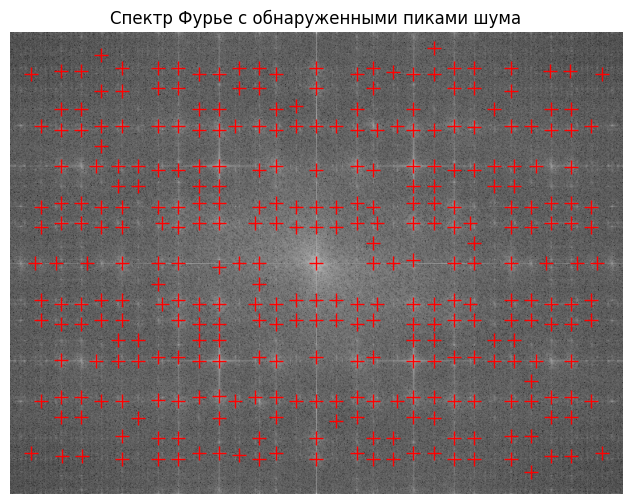

In [10]:

plt.figure(figsize=(8, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.plot(coordinates[:, 1], coordinates[:, 0], 'r+', markersize=10)
plt.title("Спектр Фурье с обнаруженными пиками шума")
plt.axis('off')
plt.show()

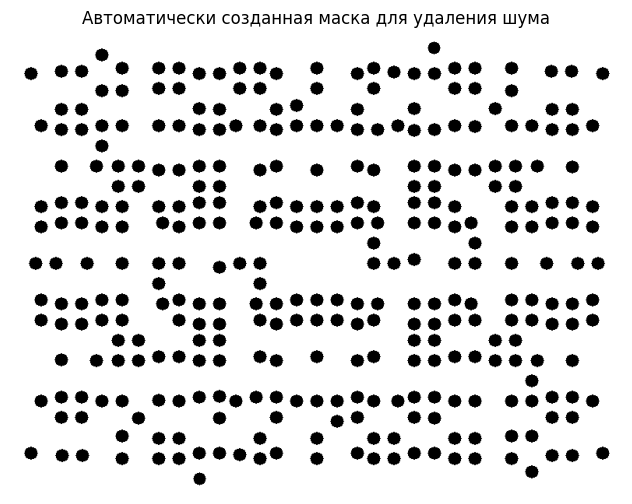

In [11]:

plt.figure(figsize=(8, 6))
plt.imshow(mask, cmap='gray')
plt.title("Автоматически созданная маска для удаления шума")
plt.axis('off')
plt.show()

Применяем маску к спектру...
Выполняем обратное преобразование Фурье...
Результат фильтрации: min=0.74, max=264.71
Отображаем результат...


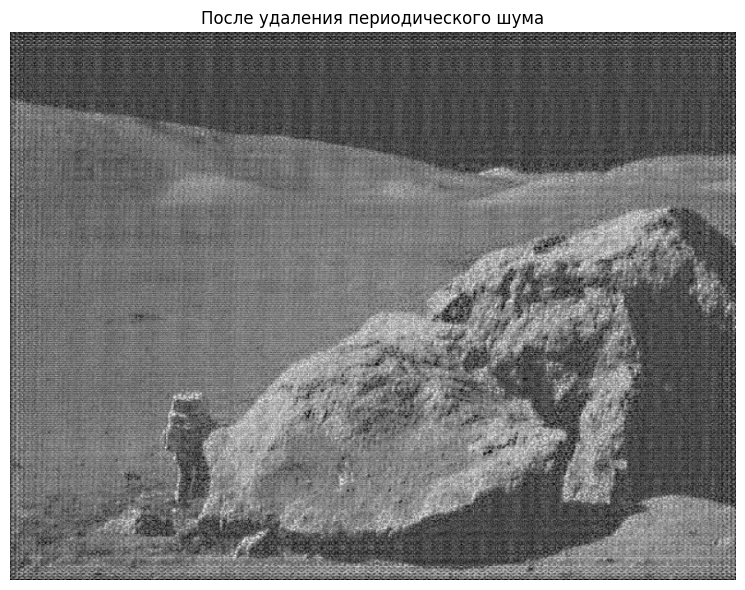

✓ Периодический шум удален с помощью автоматического обнаружения пиков


In [12]:

print("Применяем маску к спектру...")
fshift_filtered = fshift * mask

print("Выполняем обратное преобразование Фурье...")
f_ishift = np.fft.ifftshift(fshift_filtered)
img_filtered = np.fft.ifft2(f_ishift)
img_filtered = np.abs(img_filtered)

print(f"Результат фильтрации: min={img_filtered.min():.2f}, max={img_filtered.max():.2f}")

img_filtered_display = np.clip(img_filtered, 0, 255).astype(np.uint8)

print("Отображаем результат...")
plt.figure(figsize=(8, 6))
plt.imshow(img_filtered_display, cmap='gray')
plt.title("После удаления периодического шума")
plt.axis('off')
plt.tight_layout()
plt.show()

print("✓ Периодический шум удален с помощью автоматического обнаружения пиков")

In [13]:

def gaussian_highpass_filter(shape, sigma=30):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    
    x = np.arange(0, cols) - ccol
    y = np.arange(0, rows) - crow
    X, Y = np.meshgrid(x, y)
    distance = np.sqrt(X**2 + Y**2)
    
    gaussian_lowpass = np.exp(-(distance**2) / (2 * sigma**2))
    gaussian_highpass = 1 - gaussian_lowpass
    
    return gaussian_highpass

print("✓ Функция Гауссова фильтра создана")

✓ Функция Гауссова фильтра создана


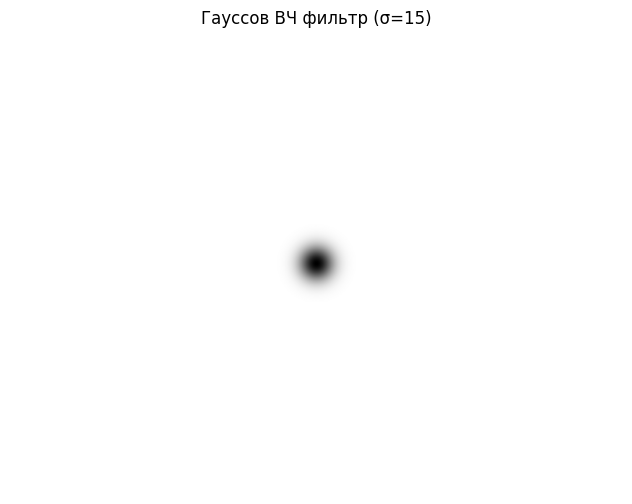

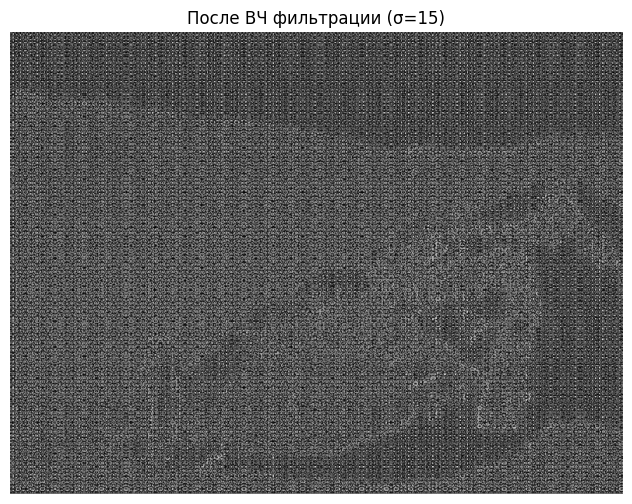

In [14]:

sigma = 15
highpass_filter_15 = gaussian_highpass_filter(img.shape, sigma=sigma)

plt.figure(figsize=(8, 6))
plt.imshow(highpass_filter_15, cmap='gray')
plt.title(f'Гауссов ВЧ фильтр (σ={sigma})')
plt.axis('off')
plt.show()


f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fshift_highpass = fshift * highpass_filter_15
f_ishift_highpass = np.fft.ifftshift(fshift_highpass)
img_highpass_15 = np.fft.ifft2(f_ishift_highpass)
img_highpass_15 = np.abs(img_highpass_15)

plt.figure(figsize=(8, 6))
plt.imshow(img_highpass_15, cmap='gray')
plt.title(f'После ВЧ фильтрации (σ={sigma})')
plt.axis('off')
plt.show()

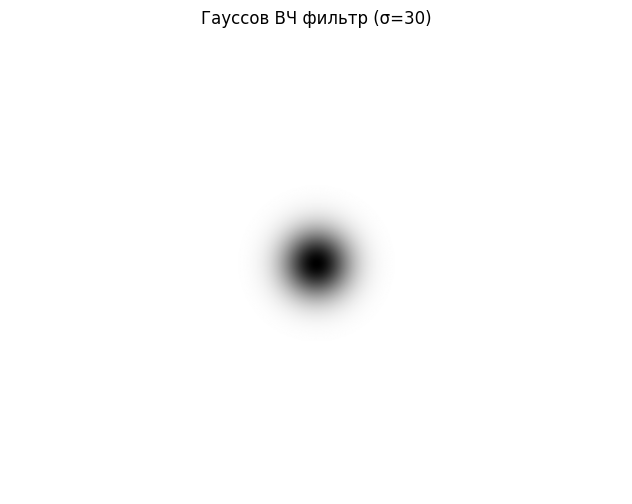

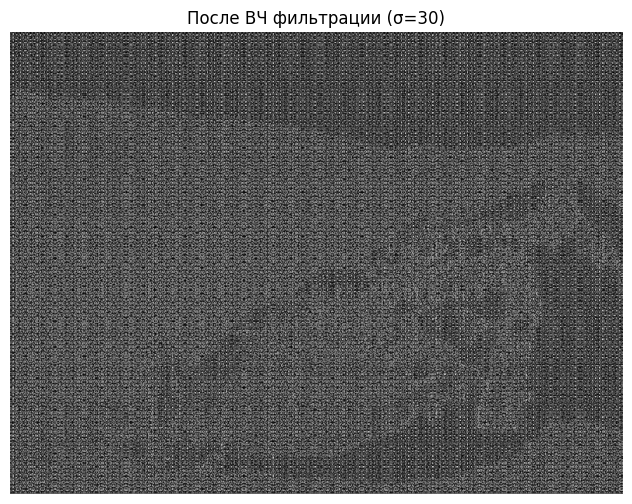

In [15]:

sigma = 30
highpass_filter_30 = gaussian_highpass_filter(img.shape, sigma=sigma)

plt.figure(figsize=(8, 6))
plt.imshow(highpass_filter_30, cmap='gray')
plt.title(f'Гауссов ВЧ фильтр (σ={sigma})')
plt.axis('off')
plt.show()

fshift_highpass = fshift * highpass_filter_30
f_ishift_highpass = np.fft.ifftshift(fshift_highpass)
img_highpass_30 = np.fft.ifft2(f_ishift_highpass)
img_highpass_30 = np.abs(img_highpass_30)

plt.figure(figsize=(8, 6))
plt.imshow(img_highpass_30, cmap='gray')
plt.title(f'После ВЧ фильтрации (σ={sigma})')
plt.axis('off')
plt.show()

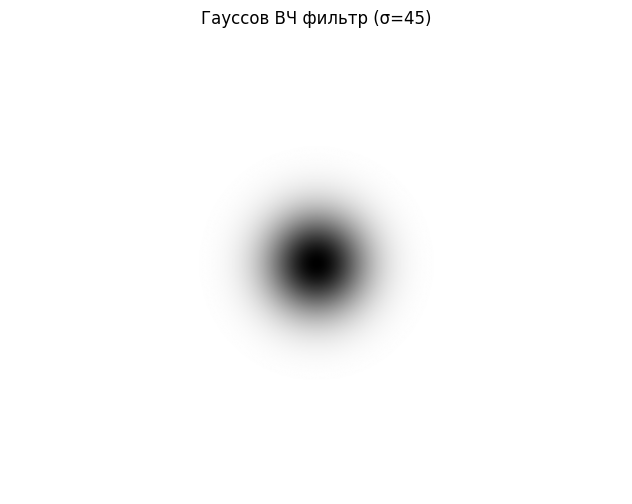

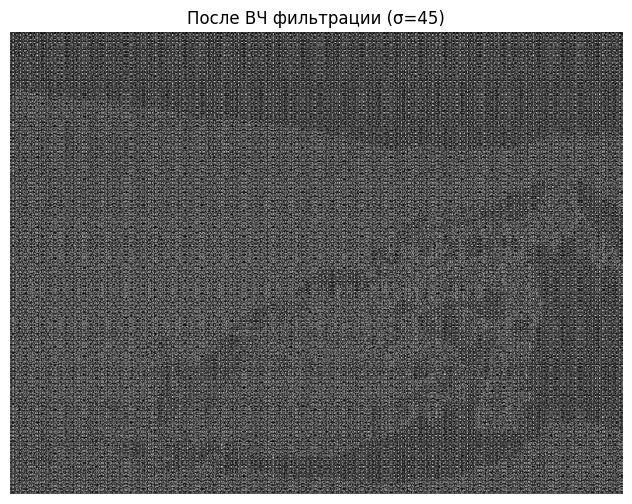

In [ ]:

sigma = 45
highpass_filter_45 = gaussian_highpass_filter(img.shape, sigma=sigma)

plt.figure(figsize=(8, 6))
plt.imshow(highpass_filter_45, cmap='gray')
plt.title(f'Гауссов ВЧ фильтр (σ={sigma})')
plt.axis('off')
plt.show()

fshift_highpass = fshift * highpass_filter_45
f_ishift_highpass = np.fft.ifftshift(fshift_highpass)
img_highpass_45 = np.fft.ifft2(f_ishift_highpass)
img_highpass_45 = np.abs(img_highpass_45)

plt.figure(figsize=(8, 6))
plt.imshow(img_highpass_45, cmap='gray')
plt.title(f'После ВЧ фильтрации (σ={sigma})')
plt.axis('off')
plt.show()
##trt